In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv("dataset.csv")
df = df[df["SystemCodeNumber"] != "BHMBRTARC01"]
df = df[df["SystemCodeNumber"] != "NIA North"] 
df["pourcentage"] = df["Occupancy"] / df["Capacity"] * 100
# df["time"] = pd.to_datetime(df["LastUpdated"])

In [127]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,pourcentage
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,10.571924
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,11.091854
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,13.864818
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,18.544194
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,25.996534


In [137]:
times = pd.DatetimeIndex(df.LastUpdated)
grouped = df.groupby([times.day, times.hour, df.SystemCodeNumber]).mean()

In [332]:
# grouped

In [147]:
from collections import defaultdict

In [190]:
# d = defaultdict(lambda: defaultdict(int))
d = defaultdict(int)
dd = []
for x in grouped.iterrows():
#     d[str(x[0][0])+"-"+str(x[0][1])] += 1
    dd.append(str(x[0][0])+"-"+str(x[0][1]))

In [166]:
# d

In [177]:
dd = [ x[1] for x in d.items() if x[1] < 28]

In [179]:
len(dd)

312

In [183]:
# dd2 = [ x[1] for x in d.items()]

In [385]:
# len(dd2)
col = ["Date", 'BHMBCCMKT01', 'BHMBCCPST01', 'BHMBCCSNH01', 'BHMBCCTHL01',
       'BHMBRCBRG01', 'BHMBRCBRG02', 'BHMBRCBRG03', 'BHMEURBRD01',
       'BHMEURBRD02', 'BHMMBMMBX01', 'BHMNCPHST01', 'BHMNCPLDH01',
       'BHMNCPNHS01', 'BHMNCPNST01', 'BHMNCPPLS01', 'BHMNCPRAN01',
       'Broad Street', 'Bull Ring', 'NIA Car Parks', 'NIA South',
       'Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS133',
       'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8',
       'Others-CCCPS98', 'Shopping']

In [243]:
new_dt = pd.DataFrame(columns=col)
new_dt["Date"] = dd
new_dt = new_dt.drop_duplicates("Date")

In [238]:
# new_dt.index[new_dt['Date'] == "2016-10-04-7"]

In [246]:
for x in grouped.iterrows():
    intt = dd.index(str(x[0][0])+"-"+str(x[0][1]))
#     print(intt)
#     print(x[0][2])
#     print(np.round(x[1]["pourcentage"]))
    new_dt.loc[intt][x[0][2]] = np.round(x[1]["pourcentage"])

In [248]:
new_dt.to_csv("parking.csv", index=False)

In [264]:
new_dt.iloc[:, 1:] = new_dt.iloc[:, 1:].apply(lambda x: x.fillna(np.round(x.mean())),axis=0)

In [267]:
new_dt.to_csv("parking_nan.csv", index=False)

In [323]:
times = pd.DatetimeIndex(df.LastUpdated)
groupe1d = df.groupby([times.week, df.SystemCodeNumber]).mean()

In [325]:
dd1 = []
for x in groupe1d.iterrows():
    dd1.append(str(x[0][0]))

In [326]:
new_dt2 = pd.DataFrame(columns=col)
new_dt2["Date"] = dd1
new_dt2 = new_dt2.drop_duplicates("Date")

In [327]:
for x in groupe1d.iterrows():
    intt = dd1.index(str(x[0][0]))
    new_dt2.loc[intt][x[0][1]] = np.round(x[1]["pourcentage"])

In [328]:
new_dt2.iloc[:, 1:] = new_dt2.iloc[:, 1:].apply(lambda x: x.fillna(np.round(x.mean())),axis=0)

In [329]:
new_dt2.to_csv("parking_week.csv", index=False)

In [331]:
new_dt2

,Date,BHMBCCMKT01,BHMBCCPST01,BHMBCCSNH01,BHMBCCTHL01,BHMBRCBRG01,BHMBRCBRG02,BHMBRCBRG03,BHMEURBRD01,BHMEURBRD02,...,NIA Car Parks,NIA South,Others-CCCPS105a,Others-CCCPS119a,Others-CCCPS133,Others-CCCPS135a,Others-CCCPS202,Others-CCCPS8,Others-CCCPS98,Shopping
0,40,29,51,52,66,38,31,23,59,56,...,14,21,57,16,28,53,32,48,31,51
28,41,27,49,60,71,69,40,25,63,60,...,16,24,57,17,41,57,35,50,32,53
56,42,28,41,52,67,66,42,25,58,65,...,16,24,55,18,47,49,33,49,32,48
84,43,33,35,54,64,72,46,26,63,60,...,27,41,55,24,50,49,34,48,39,47
112,44,27,42,58,60,68,40,26,67,64,...,13,19,52,14,47,55,32,43,29,52
140,45,26,44,66,67,61,42,27,64,51,...,14,21,54,16,46,58,33,47,30,55
168,46,28,43,68,77,55,46,27,66,60,...,17,26,54,19,45,61,35,50,30,58
196,47,32,40,78,86,57,55,32,63,72,...,16,24,59,20,50,65,36,54,31,61
224,48,23,38,84,88,62,50,29,79,82,...,16,25,61,20,50,74,40,54,33,68
252,49,27,44,80,86,66,56,32,62,58,...,16,25,61,19,53,65,35,54,32,59


In [5]:
df["pourcentage"] = df["Occupancy"] / df["Capacity"] * 100

In [23]:
len(df)

35717

In [7]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,pourcentage
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,10.571924
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,11.091854
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,13.864818
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,18.544194
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,25.996534


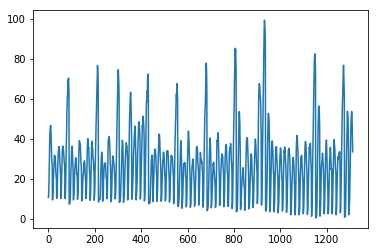

In [14]:
plt.plot(df[df["SystemCodeNumber"] == "BHMBCCMKT01"]["pourcentage"])
plt.show()

In [75]:
# df["time"] = pd.to_datetime(df["LastUpdated"])

In [51]:
# df["SystemCodeNumber"].value_counts()

In [67]:
times = pd.DatetimeIndex(df["LastUpdated"])

In [334]:
# df.groupby([times.hour]).mean()

In [333]:
# df.head(100)

In [48]:
# okk = []
# for x in df["SystemCodeNumber"].unique():
#     print(x, " ", df[df["SystemCodeNumber"] == x]["pourcentage"].mean())
#     okk.append(df[df["SystemCodeNumber"] == x]["pourcentage"].mean())

In [47]:
# plt.hist(okk, bins=10)
# plt.show()

In [336]:
from sklearn.cluster import KMeans

In [346]:
day = pd.read_csv("parking_day.csv")
X = day.drop("Date", axis=1)

In [341]:
iniertie = []
for x in range(2,10):
    km = KMeans(x).fit(X)
    iniertie.append(km.inertia_)

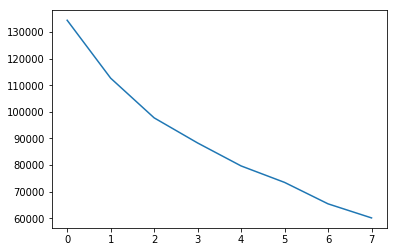

In [344]:
plt.plot(iniertie)
plt.show()

In [ ]:
col2 = ["BHMBCCMKT01", "BHMBRCBRG02", "Others-CCCPS133", "Others-CCCPS119a"]

In [376]:
list(day.columns).index("Others-CCCPS119a")

22

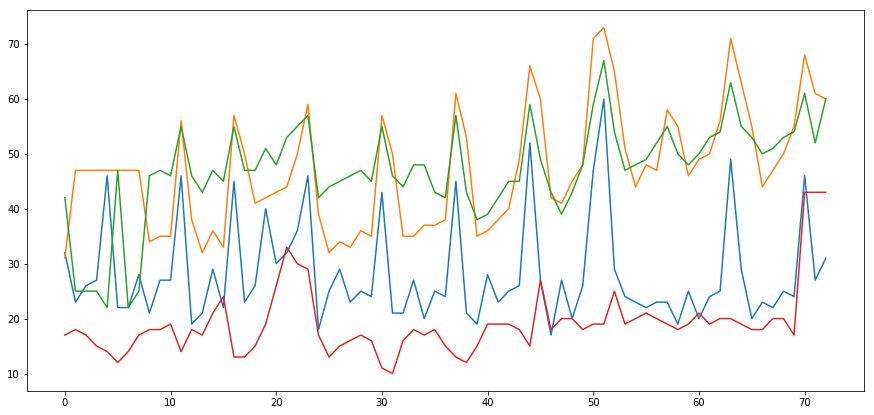

In [378]:
plt.figure(figsize=(15,7))
# for x in range(1,29):
#     plt.plot(day.iloc[:,x])
plt.plot(day.iloc[:,1])
plt.plot(day.iloc[:,6])
plt.plot(day.iloc[:,23])
plt.plot(day.iloc[:,22])

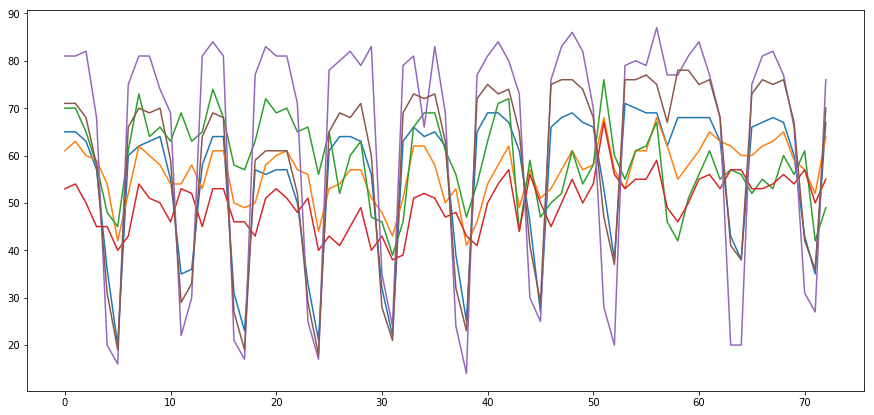

In [381]:
gr = ["Shopping", "Others-CCCPS105a", "BHMNCPNST01", "Others-CCCPS8", "Broad Street", "Others-CCCPS135a"]

plt.figure(figsize=(15,7))
for g in gr:
    gg = list(day.columns).index(g)
    plt.plot(day.iloc[:,gg])

### DAY DTW :

In [ ]:
BHMBCCMKT01      BHMBCCPST01      BHMBCCSNH01      BHMBCCTHL01      BHMBRCBRG01      BHMBRCBRG02      BHMBRCBRG03
               1                1                2                2                2                1                1
     BHMEURBRD01      BHMEURBRD02      BHMMBMMBX01      BHMNCPHST01      BHMNCPLDH01      BHMNCPNHS01      BHMNCPNST01
               2                2                2                2                2                2                2
     BHMNCPPLS01      BHMNCPRAN01     Broad Street        Bull Ring    NIA Car Parks        NIA South Others-CCCPS105a
               1                2                2                1                1                1                2
Others-CCCPS119a  Others-CCCPS133 Others-CCCPS135a  Others-CCCPS202    Others-CCCPS8   Others-CCCPS98         Shopping
               1                1                2                1                2                1                2

In [384]:
g1 = ["BHMBCCMKT01", "BHMBCCPST01", "BHMBRCBRG02", "BHMBRCBRG03", "BHMNCPPLS01", "Bull Ring", "NIA Car Parks",  "NIA South", "Others-CCCPS119a", "Others-CCCPS133", 
      "Others-CCCPS202", "Others-CCCPS98"]

In [386]:
g2 = [ x for x in col if x not in g1]

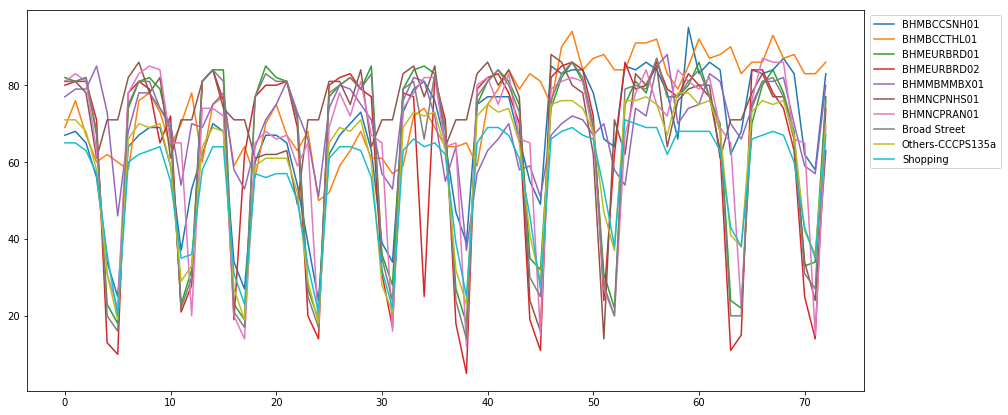

In [431]:
plt.figure(figsize=(15,7))
for g in g2:
    gg = list(day.columns).index(g)
    if gg not in [0, 26, 11, 5, 12, 14, 21]:
        plt.plot(day.iloc[:,gg], label=g)
plt.legend(loc=1, bbox_to_anchor=(1.17, 1))

### Day PICCOLO

In [ ]:
  BHMBCCMKT01      BHMBCCPST01      BHMBCCSNH01      BHMBCCTHL01      BHMBRCBRG01      BHMBRCBRG02      BHMBRCBRG03
               1                1                1                2                1                1                1
     BHMEURBRD01      BHMEURBRD02      BHMMBMMBX01      BHMNCPHST01      BHMNCPLDH01      BHMNCPNHS01      BHMNCPNST01
               1                1                2                1                1                2                2
     BHMNCPPLS01      BHMNCPRAN01     Broad Street        Bull Ring    NIA Car Parks        NIA South Others-CCCPS105a
               1                1                1                1                2                2                1
Others-CCCPS119a  Others-CCCPS133 Others-CCCPS135a  Others-CCCPS202    Others-CCCPS8   Others-CCCPS98         Shopping
               2                2                1                1                2                2                1

In [432]:
g1 = ["BHMBCCMKT01", "BHMBCCPST01", "BHMBCCSNH01", "BHMBRCBRG01", "BHMBRCBRG02", "BHMBRCBRG03", "BHMEURBRD01", "BHMEURBRD02", "BHMNCPHST01", "BHMNCPLDH01",
     "BHMNCPPLS01", "BHMNCPRAN01", "Broad Street", "Bull Ring", "Others-CCCPS105a", "Others-CCCPS135a", "Others-CCCPS202", "Shopping"]

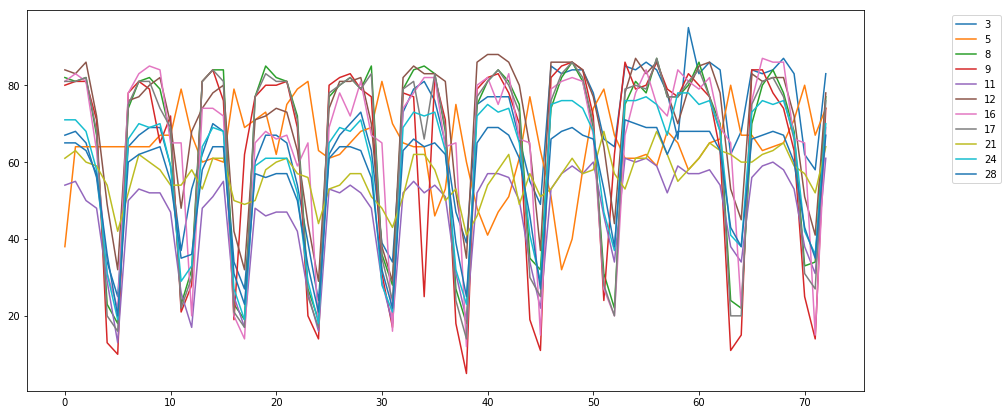

In [443]:
plt.figure(figsize=(15,7))
for g in g1:
    gg = list(day.columns).index(g)
    if gg not in [15, 1, 7, 2, 6, 25, 18]:
        plt.plot(day.iloc[:,gg], label=gg)
plt.legend(loc=1, bbox_to_anchor=(1.17, 1))

### WEEK PICOLO

In [444]:
week = pd.read_csv("parking_week.csv")

In [ ]:
 BHMBCCMKT01      BHMBCCPST01      BHMBCCSNH01      BHMBCCTHL01      BHMBRCBRG01      BHMBRCBRG02      BHMBRCBRG03
               1                1                2                2                1                2                2
     BHMEURBRD01      BHMEURBRD02      BHMMBMMBX01      BHMNCPHST01      BHMNCPLDH01      BHMNCPNHS01      BHMNCPNST01
               1                1                2                2                2                1                2
     BHMNCPPLS01      BHMNCPRAN01     Broad Street        Bull Ring    NIA Car Parks        NIA South Others-CCCPS105a
               2                1                1                2                1                1                2
Others-CCCPS119a  Others-CCCPS133 Others-CCCPS135a  Others-CCCPS202    Others-CCCPS8   Others-CCCPS98         Shopping
               2                2                2                2                2                1                2

In [447]:
g1 = ["BHMBCCMKT01", "BHMBCCPST01", "BHMBRCBRG01", "BHMEURBRD01", "BHMEURBRD02", "BHMNCPNHS01", "BHMNCPRAN01", "Broad Street", "NIA Car Parks", "NIA South",
     "Others-CCCPS98"]

g2 = [ x for x in col if x not in g1]

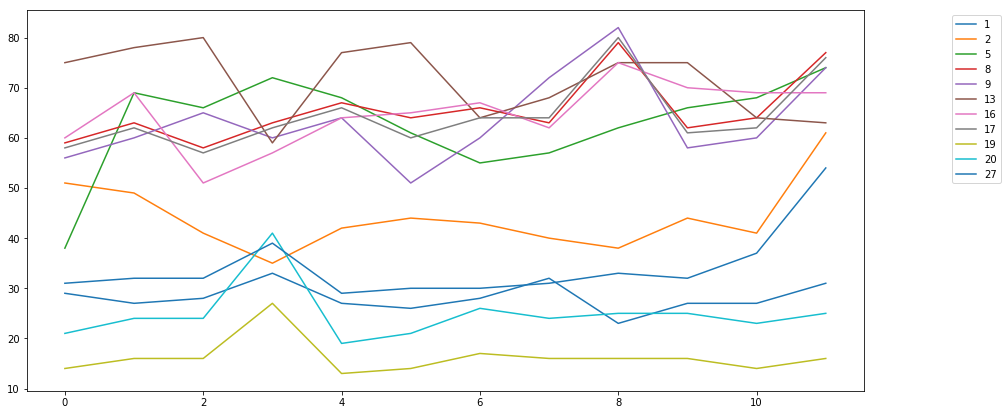

In [446]:
plt.figure(figsize=(15,7))
for g in g1:
    gg = list(week.columns).index(g)
    if gg not in [-1]:
        plt.plot(week.iloc[:,gg], label=gg)
plt.legend(loc=1, bbox_to_anchor=(1.17, 1))

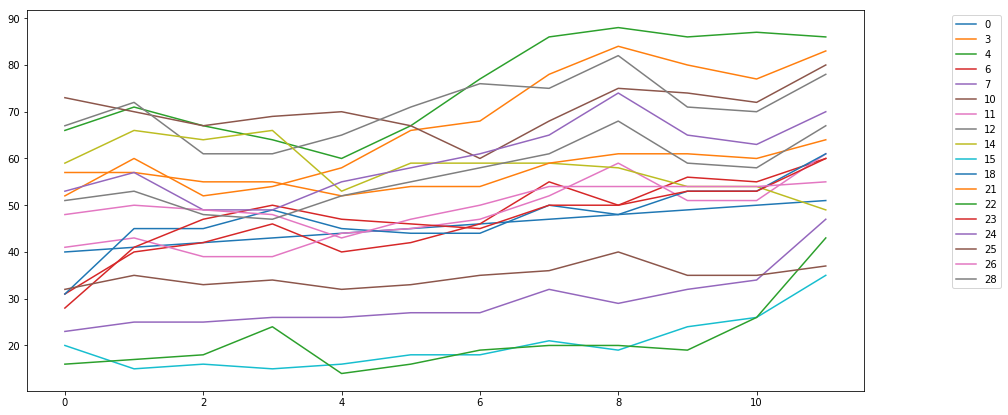

In [448]:
plt.figure(figsize=(15,7))
for g in g2:
    gg = list(week.columns).index(g)
    if gg not in [-1]:
        plt.plot(week.iloc[:,gg], label=gg)
plt.legend(loc=1, bbox_to_anchor=(1.17, 1))

### WEEK DTW

In [ ]:
    BHMBCCMKT01      BHMBCCPST01      BHMBCCSNH01      BHMBCCTHL01      BHMBRCBRG01      BHMBRCBRG02      BHMBRCBRG03
               1                2                2                2                2                1                1
     BHMEURBRD01      BHMEURBRD02      BHMMBMMBX01      BHMNCPHST01      BHMNCPLDH01      BHMNCPNHS01      BHMNCPNST01
               2                2                2                2                2                2                2
     BHMNCPPLS01      BHMNCPRAN01     Broad Street        Bull Ring    NIA Car Parks        NIA South Others-CCCPS105a
               1                2                2                1                1                1                2
Others-CCCPS119a  Others-CCCPS133 Others-CCCPS135a  Others-CCCPS202    Others-CCCPS8   Others-CCCPS98         Shopping
               1                1                2                1                2                1                2

In [451]:
g1 = ["BHMBCCMKT01", "BHMBRCBRG02", "BHMBRCBRG03", "BHMNCPPLS01", "Bull Ring", "NIA Car Parks", "NIA South", 
     "Others-CCCPS119a", "Others-CCCPS133", "Others-CCCPS202", "Others-CCCPS98"]

g2 = [ x for x in col if x not in g1]

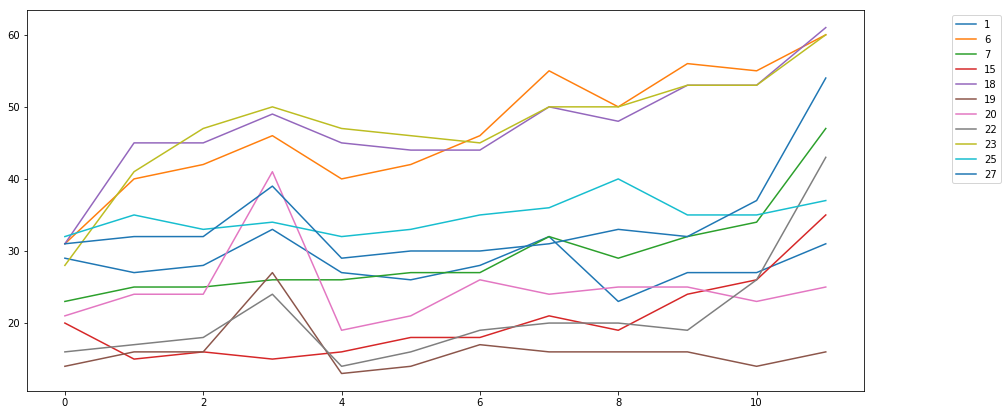

In [450]:
plt.figure(figsize=(15,7))
for g in g1:
    gg = list(week.columns).index(g)
    if gg not in [-1]:
        plt.plot(week.iloc[:,gg], label=gg)
plt.legend(loc=1, bbox_to_anchor=(1.17, 1))

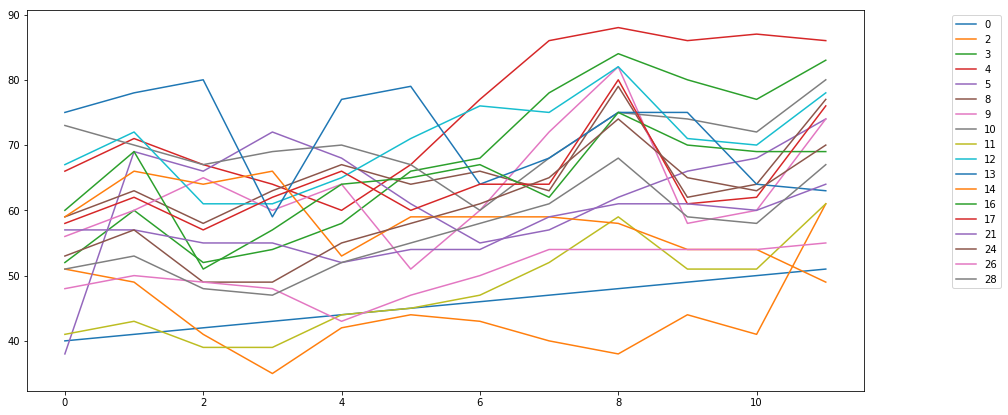

In [452]:
plt.figure(figsize=(15,7))
for g in g2:
    gg = list(week.columns).index(g)
    if gg not in [-1]:
        plt.plot(week.iloc[:,gg], label=gg)
plt.legend(loc=1, bbox_to_anchor=(1.17, 1))